In [1]:
from src.ocsvm.OneClassSVMClassifier import OneClassSVMClassifier
from src.ocsvm.OneClassSVMClassifier import OneClassSVMModel 
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load Iris Flower Dataset
iris = datasets.load_iris()
feature_names = iris.feature_names
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Experiment 1


Number of Instances: 150 (50 in each of three classes)

Number of Attributes: 4 (numeric)

Attribute Information: sepal length in cm, sepal width in cm, petal length in cm, petal width in cm

Class: Iris-Setosa, Iris-Versicolour, Iris-Virginica


Let us consider only 2 features for easy visualization - sepal length in cm, sepal width in cm
Since we are doing unsupervised learning, we will not consider the classes of the data samples.

In [3]:
X_scaled=X_scaled[:,:-2]
X_scaled.shape

(150, 2)

In [4]:
feature_names = feature_names[:-2]
feature_names

['sepal length (cm)', 'sepal width (cm)']

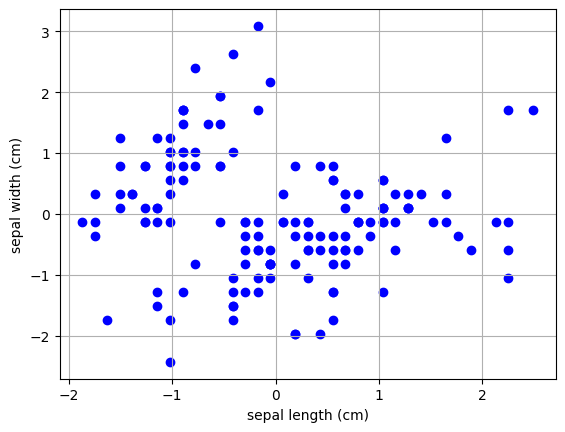

In [5]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], color='b')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.grid()
plt.show()

In [6]:
# Create a OCSVM Model
ocsvm = OneClassSVMModel(nu=0.1, gamma=0.3)

In [7]:
x_data = torch.tensor(X_scaled)

# Fit the model
decision, y_pred = ocsvm.fit(x_data)

In [8]:
# Create a OCSVM Classifier Class
classifier = OneClassSVMClassifier(x_data, nu=0.1, gamma=0.3, num_inducing_points=100)

In [9]:
classifier.fit()

(array([ 1.70031177e-02,  1.62579202e-02,  1.31935711e-02,  1.06751453e-02,
         1.53463417e-02,  1.61980924e-02,  6.16070686e-03,  1.64495428e-02,
        -1.71809081e-08,  1.62114589e-02,  1.80365619e-02,  1.34680882e-02,
         1.54334759e-02, -5.61174406e-03,  7.69047356e-03, -3.58323919e-02,
         1.61980924e-02,  1.70031177e-02,  1.45871201e-02,  1.40129904e-02,
         1.29984453e-02,  1.61150931e-02, -1.63558136e-03,  1.59429899e-02,
         1.34680882e-02,  1.61937299e-02,  1.64495428e-02,  1.69878600e-02,
         1.59206742e-02,  1.31935711e-02,  1.54403939e-02,  1.29984453e-02,
         9.64578288e-08, -4.51874348e-03,  1.62114589e-02,  1.61813806e-02,
         1.33391171e-02,  1.27233509e-02,  1.04076160e-03,  1.65592057e-02,
         1.61932083e-02, -2.03151544e-02, -8.54266826e-08,  1.61932083e-02,
         1.40129904e-02,  1.54334759e-02,  1.40129904e-02,  1.00251411e-02,
         1.82378801e-02,  1.63712138e-02,  1.17219137e-02,  1.23048434e-03,
         1.1

In [10]:
decision, y_pred = classifier.decision()
y_pred

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
       -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [11]:
# Check for the number of outliers

counts = {1: np.sum(y_pred == 1), -1: np.sum(y_pred == -1)}
total = len(y_pred)
percentages = {key: (count / total) * 100 for key, count in counts.items()}

results = {key: {"count": counts[key], "percentage": percentages[key]} for key in counts}

print(results)

{1: {'count': 132, 'percentage': 88.0}, -1: {'count': 18, 'percentage': 12.0}}


In [12]:
# Outlier sample indices
indices = [i for i, value in enumerate(y_pred) if value == -1]
indices

[8, 13, 15, 22, 33, 41, 42, 56, 60, 68, 87, 100, 109, 117, 118, 122, 131, 135]

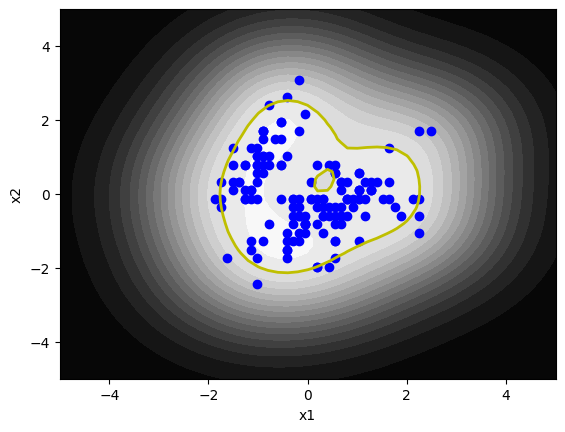

In [13]:
classifier.plot()

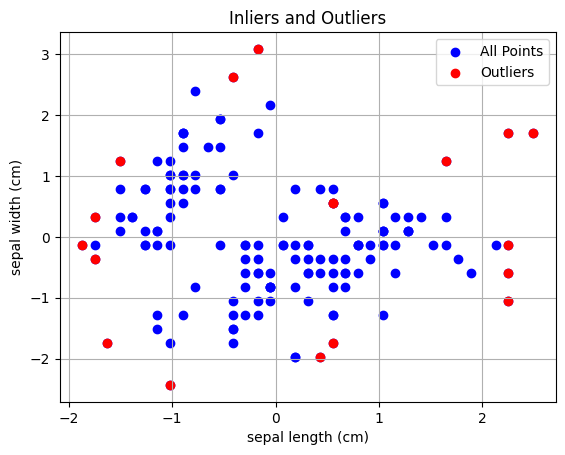

In [14]:
# Plot outliers with inliers

plt.scatter(x_data[:, 0], x_data[:, 1], color='blue', label='All Points')
outliers = x_data[indices]
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Inliers and Outliers')
plt.legend()
plt.grid()
plt.show()

In [18]:
outlier_features = x_data[indices]

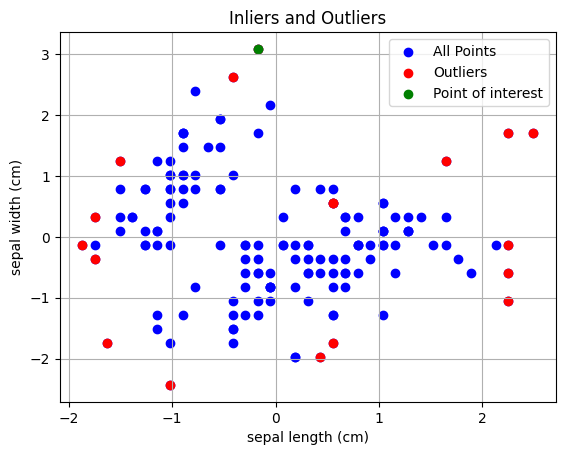

In [20]:
plt.scatter(x_data[:, 0], x_data[:, 1], color='blue', label='All Points')
outliers = x_data[indices]
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers')
plt.scatter(x_data[15, 0], x_data[15, 1], color='green', label='Point of interest')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Inliers and Outliers')
plt.legend()
plt.grid()
plt.show()

The point with index 15 is a clear outlier and the reason should be bause of very high sepal width (>3 cm). 
This point should have a very high shapley value for sepal width.

In [21]:
from src.explanation_algorithms.OCSVMSHAP import OCSVMSHAP
ocsvm_shap = OCSVMSHAP(X=x_data, classifier=classifier)

In [22]:
ocsvm_shap.fit_ocsvmshap(X=x_data, num_coalitions=2**x_data.shape[1])

/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
100%|██████████| 3/3 [00:00<00:00, 191.23it/s]


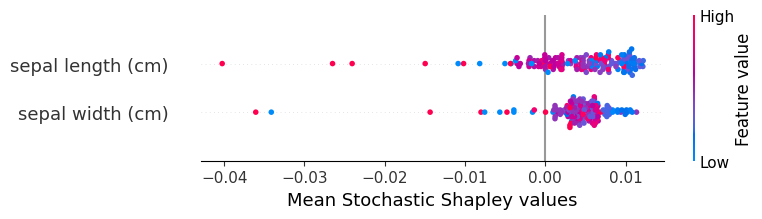

In [23]:
from src.utils.visualisation.deterministic_values import summary_plot, bar_plot
mean_stochastic_shapley_values = ocsvm_shap.return_deterministic_shapley_values()
summary_plot(mean_stochastic_shapley_values, x_data, feature_names=feature_names)
plt.xlabel("Mean Stochastic Shapley values")
plt.show()

/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/visualisation/deterministic_values.py:25: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1708025535429/work/aten/src/ATen/native/TensorShape.cpp:3641.)
  return shap.bar_plot(shapley_values.T.numpy(), query_data.numpy(), show=False,


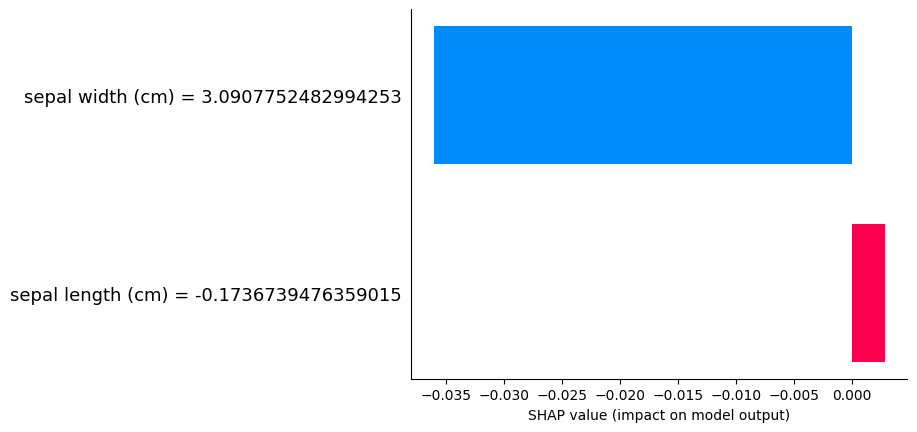

In [24]:
bar_plot(mean_stochastic_shapley_values.T[15], x_data[15], feature_names = feature_names)

As expected, the sepal width has the highest impact in deciding that this point is an outlier

## Experiment 2

Let us now consider all 4 features of the iris dataset

In [28]:
iris = datasets.load_iris()
feature_names = iris.feature_names
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(150, 4)

In [29]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [30]:
ocsvm = OneClassSVMModel(nu=0.1, gamma=0.3)

In [31]:
x_data = torch.tensor(X_scaled)

# Fit the model
decision, y_pred = ocsvm.fit(x_data)

In [32]:
# Create a OCSVM Classifier Class
classifier = OneClassSVMClassifier(x_data, nu=0.1, gamma=0.3, num_inducing_points=100)

In [33]:
classifier.fit()

(array([ 1.29356905e-02,  3.73948823e-03,  8.94483145e-03,  6.95608439e-03,
         1.40277033e-02,  1.29630381e-02,  6.42438846e-03,  1.17521280e-02,
        -2.77555756e-17,  3.72502809e-03,  1.23990783e-02,  1.05235525e-02,
         2.75951441e-03, -6.13019023e-03,  4.65410662e-07, -2.20468004e-02,
         1.34618755e-02,  1.36054059e-02,  4.76152080e-03,  1.42039585e-02,
        -2.23379596e-07,  1.41881148e-02, -1.10218687e-07,  6.35460023e-03,
         7.01049628e-03,  1.42261016e-03,  1.14241088e-02,  1.13251378e-02,
         7.99659314e-03,  8.58693261e-03,  7.65902714e-03,  1.71542456e-03,
         7.98659249e-04,  5.62380026e-07,  6.53823694e-03,  5.71800393e-03,
        -2.29669478e-08,  1.03838244e-02,  9.10360370e-04,  1.04321375e-02,
         1.37162826e-02, -2.33195370e-02,  1.02161038e-03,  5.90365799e-03,
         9.48584690e-03,  6.94598539e-03,  1.30339561e-02,  7.57697519e-03,
         1.42980044e-02,  9.58484363e-03,  2.89663561e-07,  1.56811228e-02,
         1.4

In [34]:
decision, y_pred = classifier.decision()
y_pred

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
       -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [35]:
# Check for the number of outliers

counts = {1: np.sum(y_pred == 1), -1: np.sum(y_pred == -1)}
total = len(y_pred)
percentages = {key: (count / total) * 100 for key, count in counts.items()}

results = {key: {"count": counts[key], "percentage": percentages[key]} for key in counts}

print(results)

{1: {'count': 140, 'percentage': 93.33333333333333}, -1: {'count': 10, 'percentage': 6.666666666666667}}


In [36]:
# Outlier sample indices
indices = [i for i, value in enumerate(y_pred) if value == -1]
indices

[8, 13, 15, 20, 22, 36, 41, 60, 118, 131]

In [37]:
from src.explanation_algorithms.OCSVMSHAP import OCSVMSHAP
ocsvm_shap = OCSVMSHAP(X=x_data, classifier=classifier)

In [38]:
ocsvm_shap.fit_ocsvmshap(X=x_data, num_coalitions=2**x_data.shape[1])

/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
100%|██████████| 15/15 [00:05<00:00,  2.98it/s]


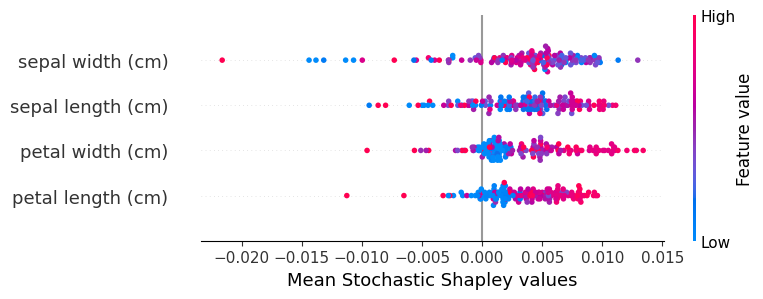

In [39]:
from src.utils.visualisation.deterministic_values import summary_plot, bar_plot
mean_stochastic_shapley_values = ocsvm_shap.return_deterministic_shapley_values()
summary_plot(mean_stochastic_shapley_values, x_data, feature_names=feature_names)
plt.xlabel("Mean Stochastic Shapley values")
plt.show()

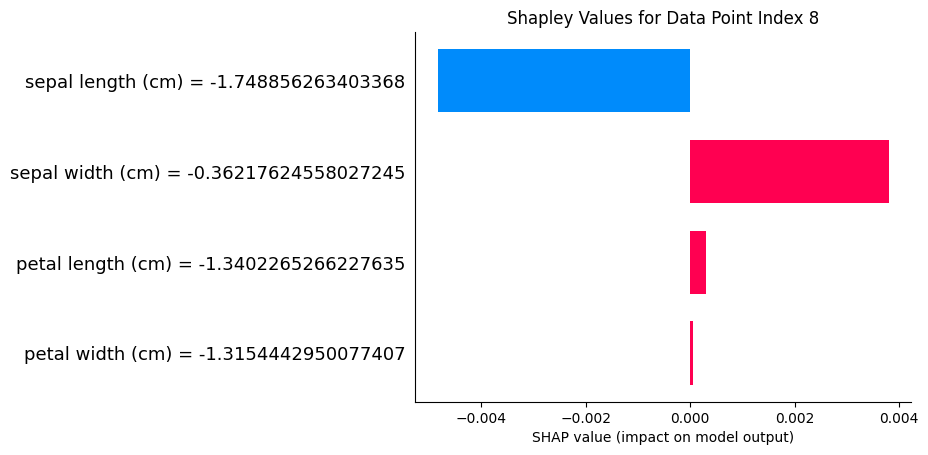

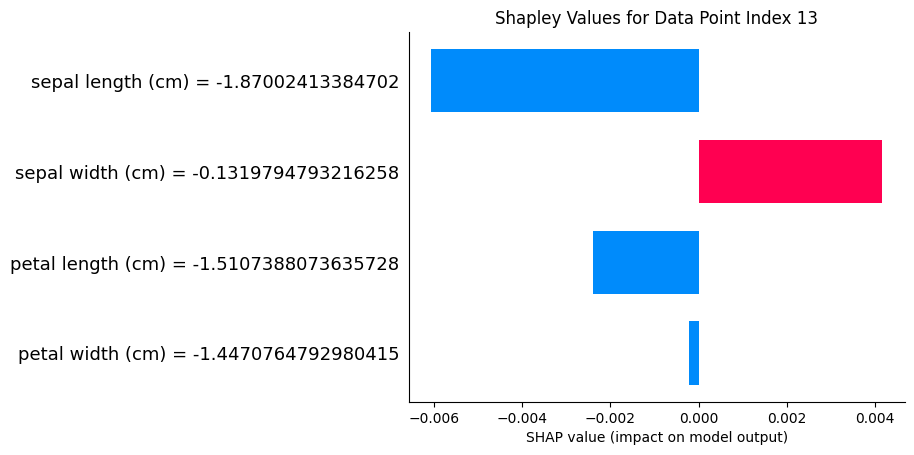

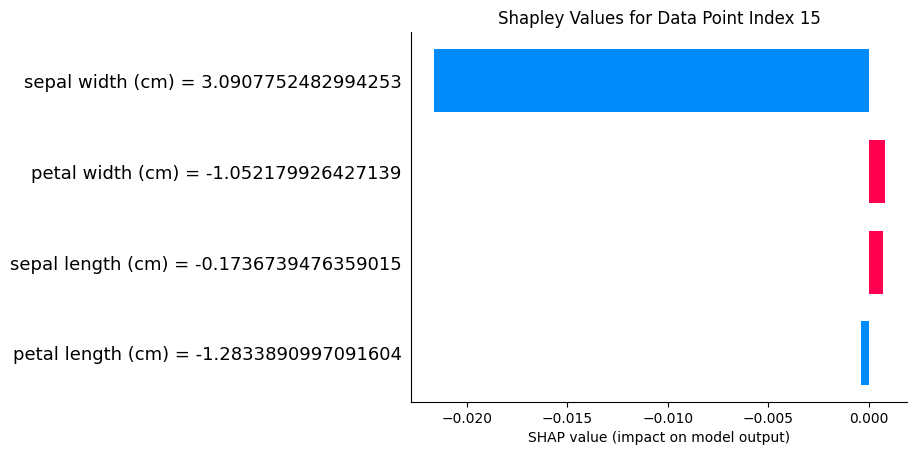

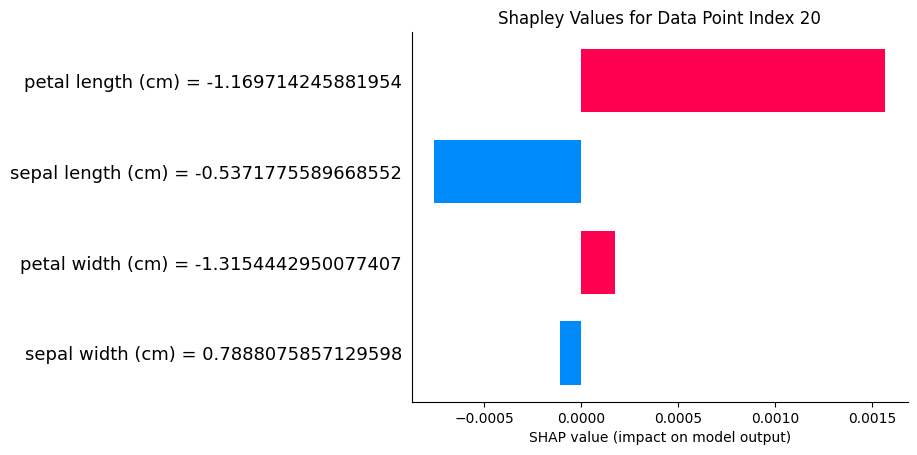

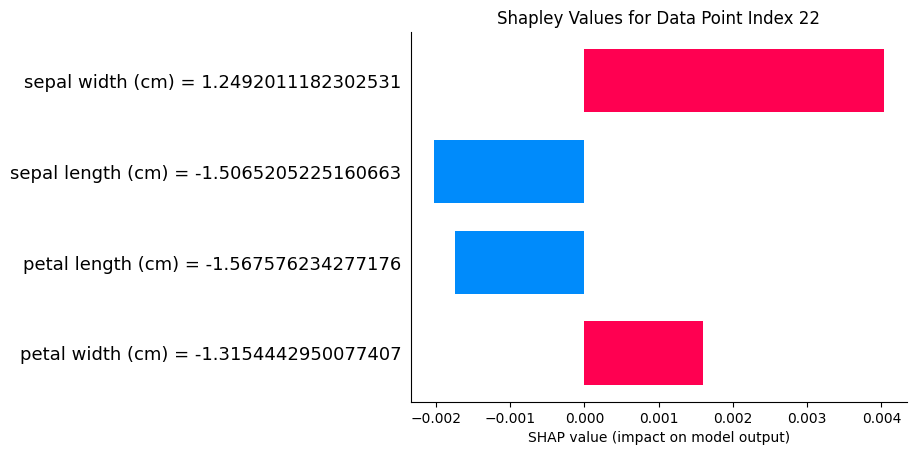

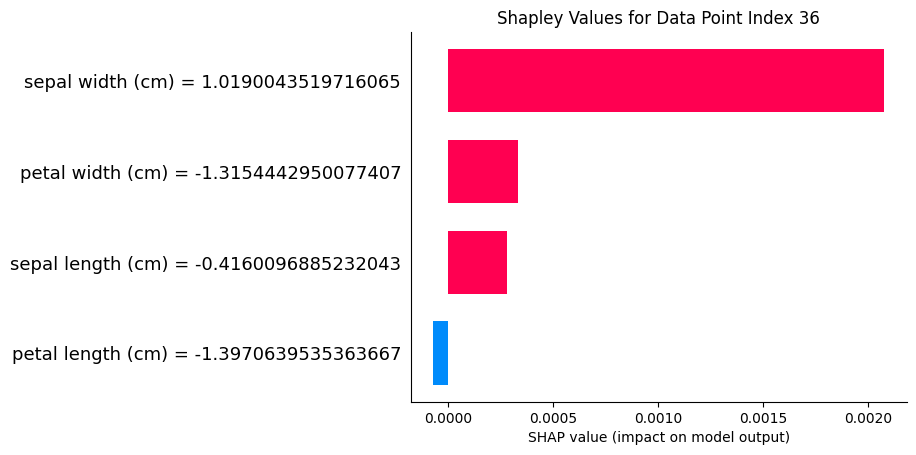

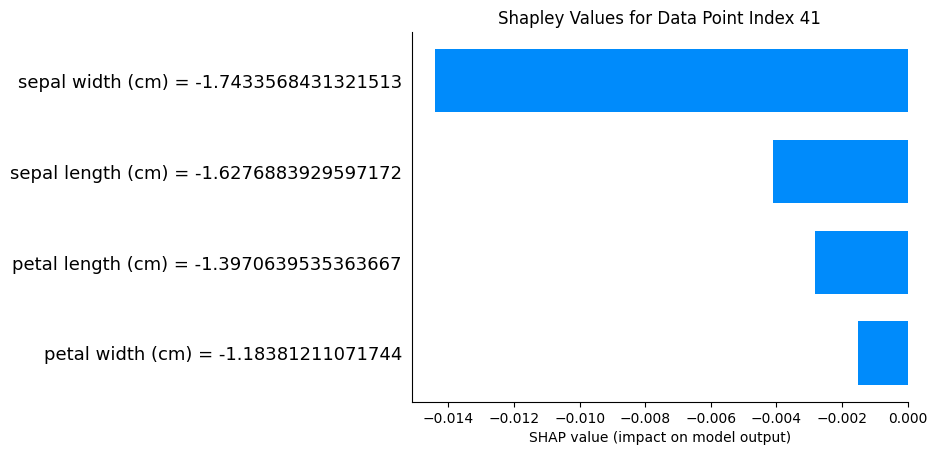

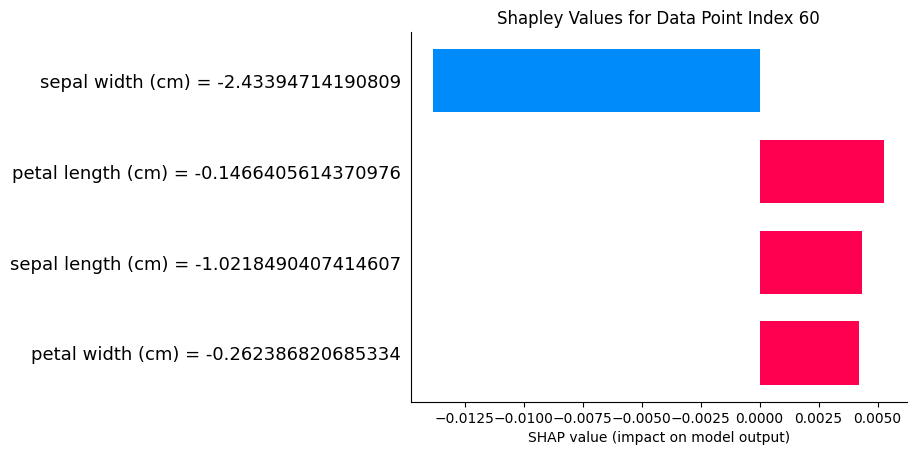

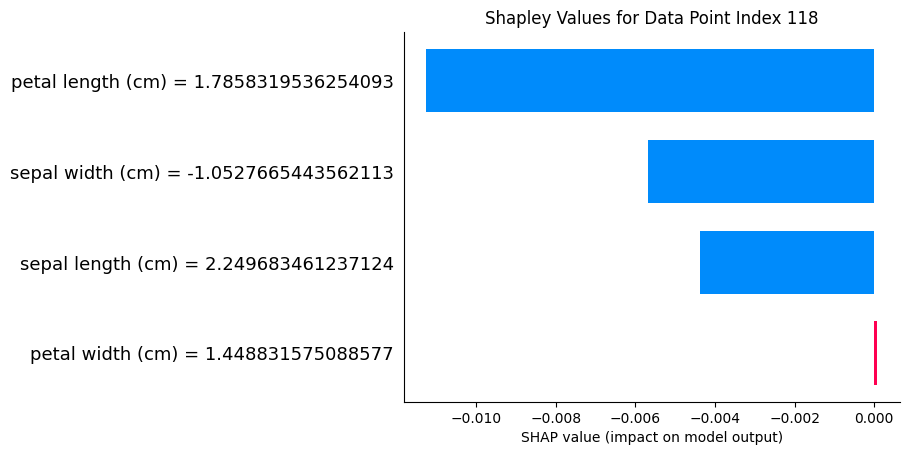

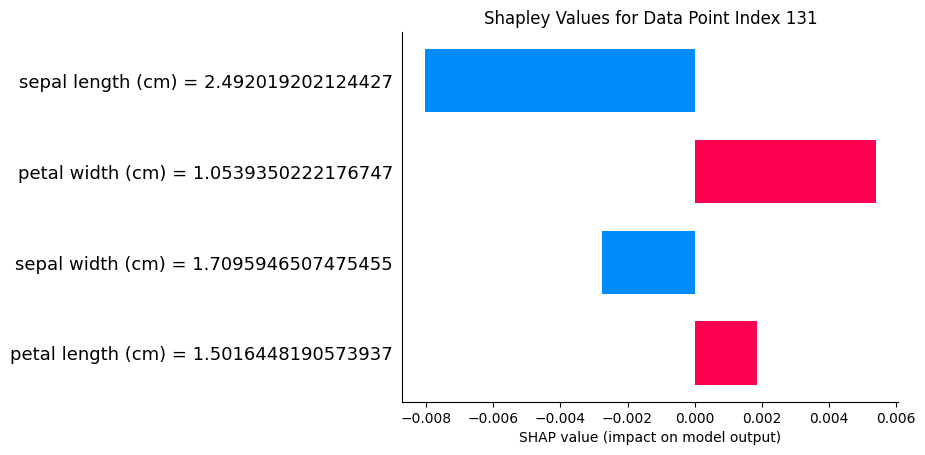

In [41]:
for i in indices:
    plt.figure()  
    bar_plot(mean_stochastic_shapley_values.T[i], x_data[i], feature_names=feature_names)
    plt.title(f'Shapley Values for Data Point Index {i}')
    plt.show() 